## Libraries

In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

## Import Dataset

In [2]:
data = pd.read_csv('housing.csv')
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


First 10 rows of dataset

## Features

In [3]:
data.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

Features of dataset

## Data Information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Shows the, 
* The column name
* The number of non-null values in the column
* The data type of the column
* The amount of memory used by the column
of the dataset.

In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We can see that the maximum bedrooms within a block are 6445 while mean bedrooms are 537. So it seems like the data is skewed, we will check that with a histogram

Descriptive statistics

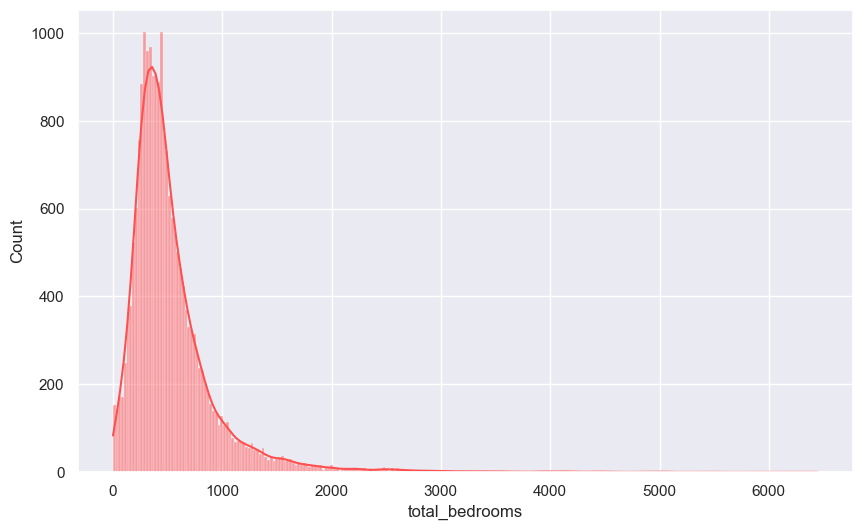

In [37]:
plt.figure(figsize= (10, 6))
sns.histplot(data['total_bedrooms'], color = '#ff5050', kde= True);

## Check for null values

In [7]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

As we can see the above diagram is skewed. That is because maximum bedrooms within a block are 6445 while mean bedrooms are 537. So as for the solution we will be replacing the missing values with median number of rooms within a block

In [8]:
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace= True)

# Exploratory Data Analysis

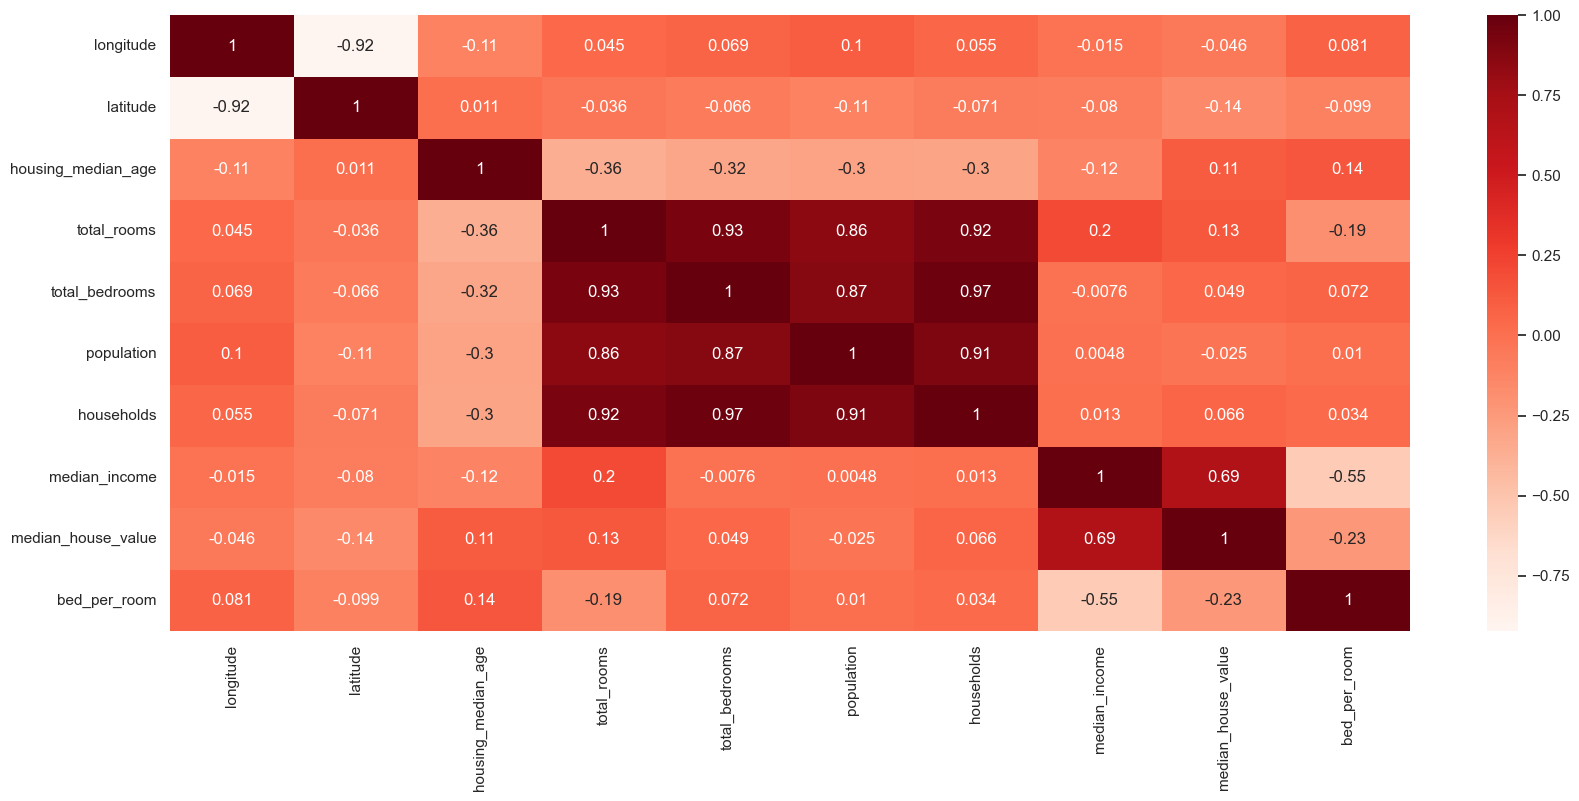

In [36]:
plt.figure(figsize= (20, 8))
sns.heatmap(data.corr(numeric_only=True), annot= True, cmap='Reds')
plt.show()

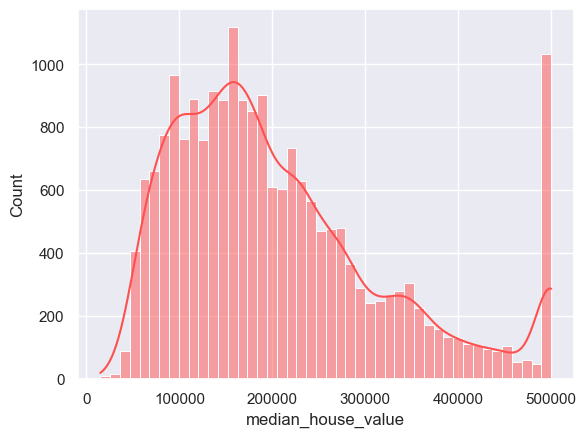

In [38]:
sns.histplot(data['median_house_value'], color = '#ff5050', kde= True);

In [11]:
data['median_house_value'].skew()

0.9777632739098341

As we can see a lot of features are skewed. For that reason feature transformation is used.

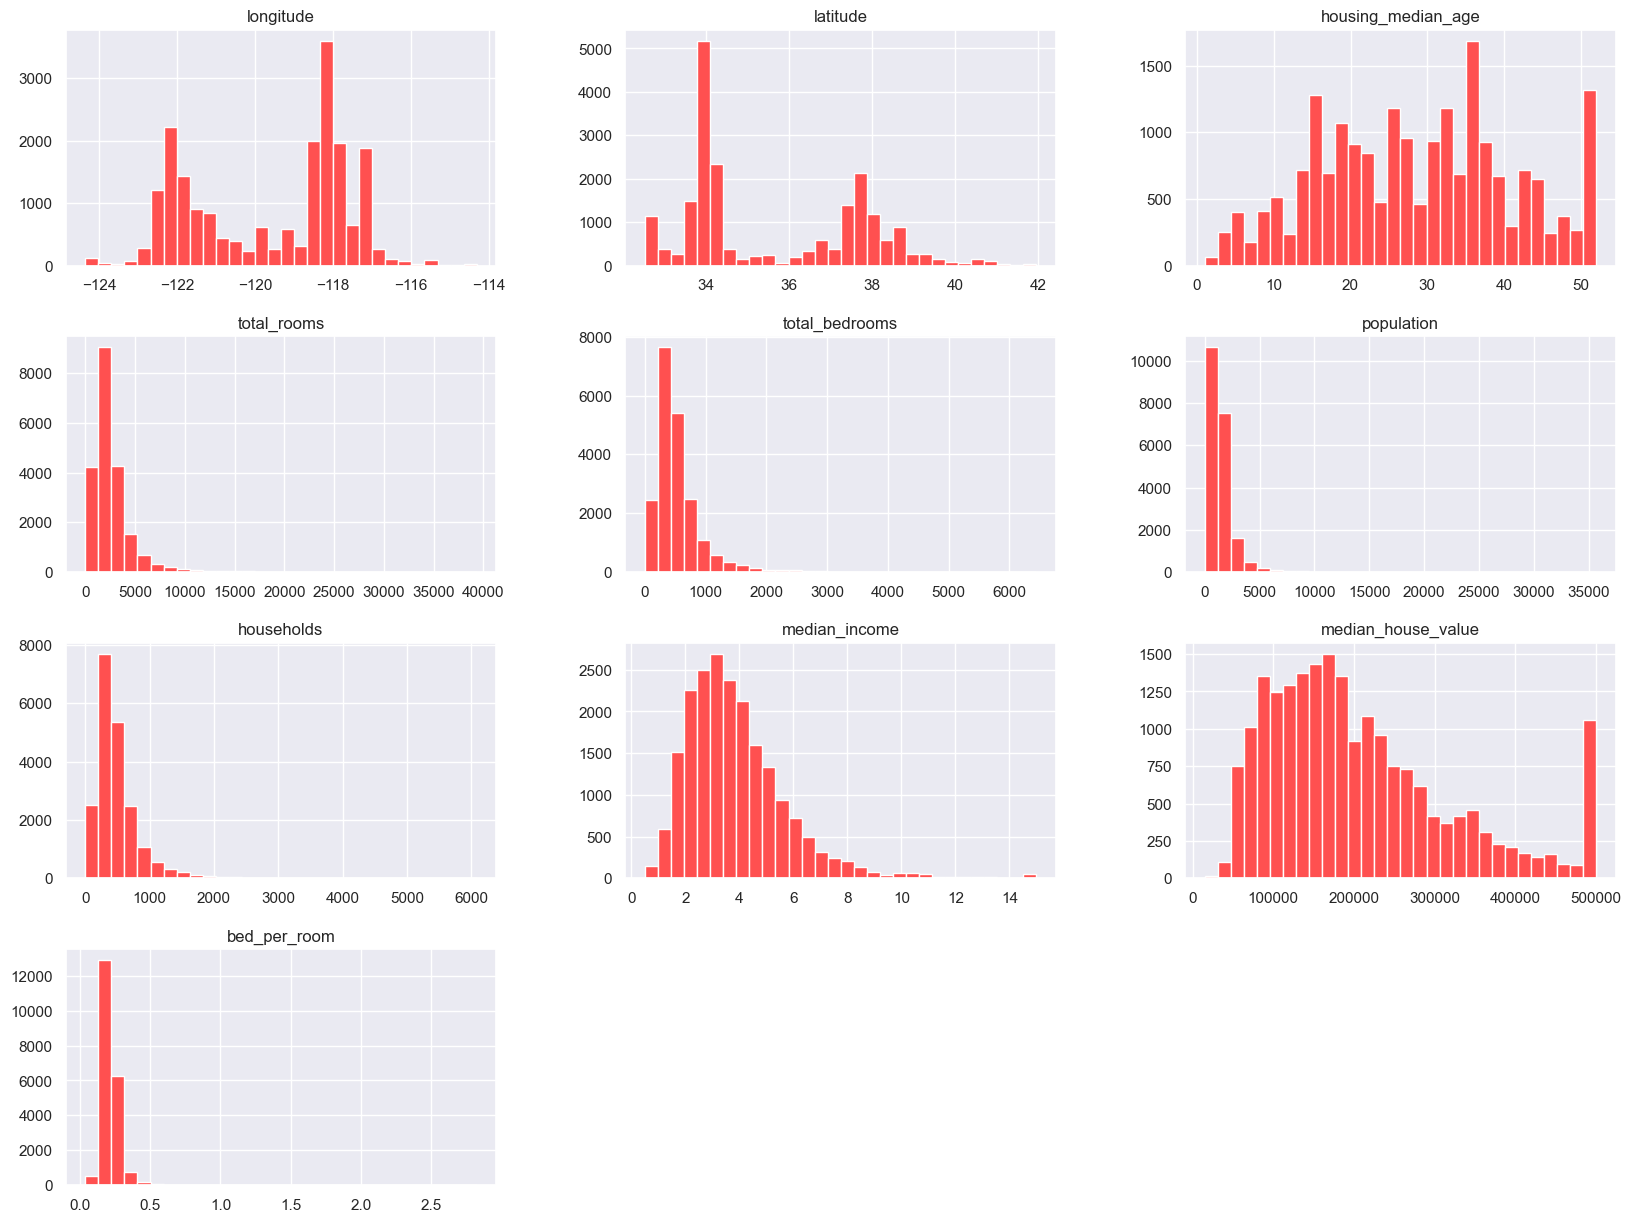

In [39]:
data.hist(bins = 30, figsize=(20, 15), color = '#ff5050');

As we can see a lot of features are skewed. For that reason feature transformation is used.

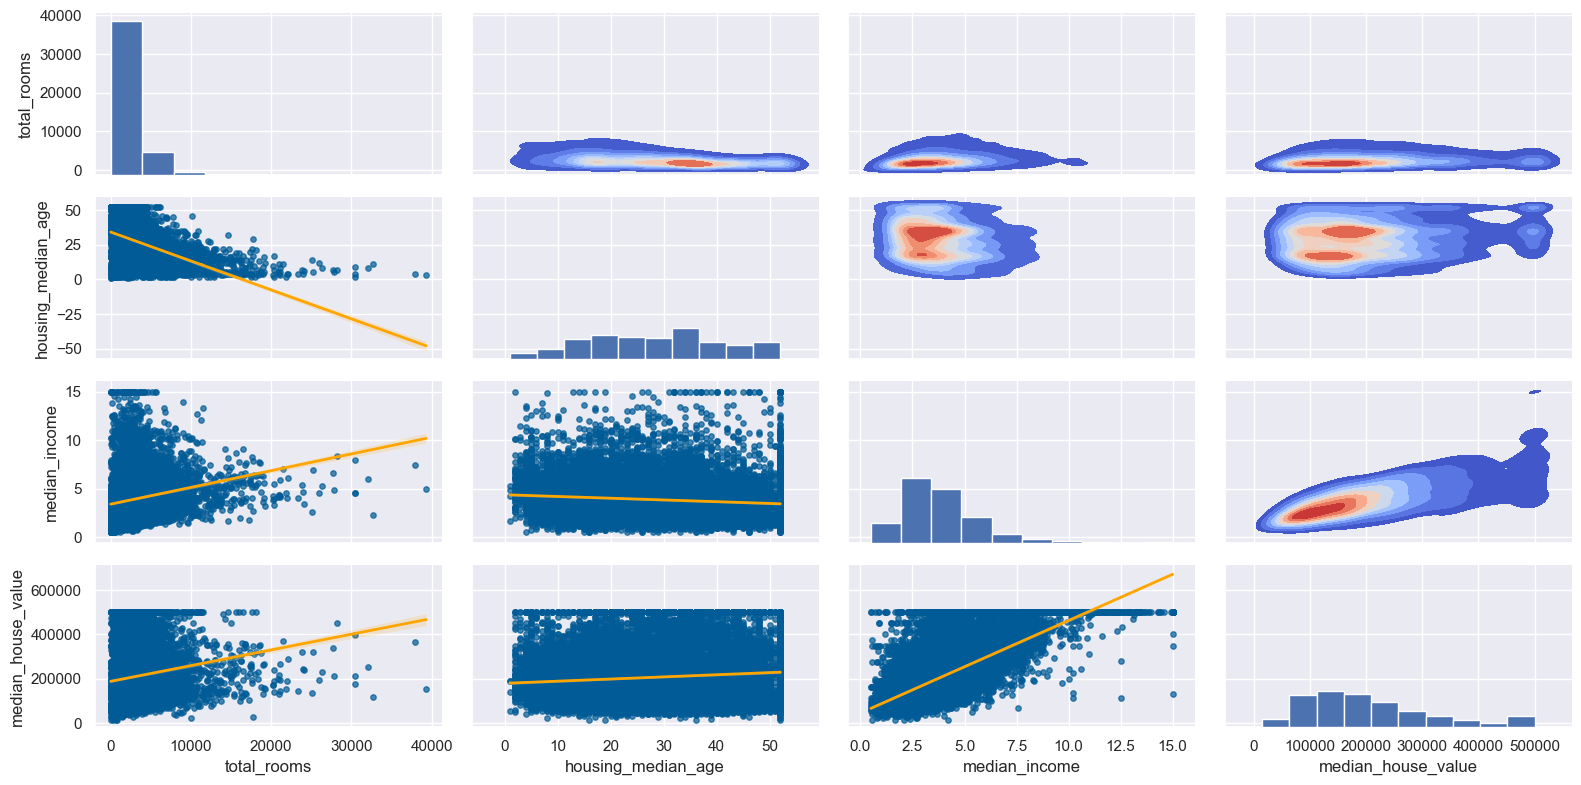

In [13]:
grid = sns.PairGrid(data, vars=['total_rooms', 'housing_median_age', 'median_income', 'median_house_value'],
                    height=2, aspect = 2)

grid = grid.map_diag(plt.hist)
grid = grid.map_lower(sns.regplot, scatter_kws = {'s': 15, 'alpha': 0.7, 'color': '#005b96'}, 
                      line_kws = {'color':'orange', 'linewidth': 2})
grid = grid.map_upper(sns.kdeplot, n_levels = 10, cmap= 'coolwarm', fill = True)

plt.show()

Since there are lot of outliers in the features log transformation is needed.

In this dataset the feature 'ocean_proximity' can be categorized in to 5 categories. Which are, 
    * Near Bay
	* <1H Ocean
	* INLAND
	* NEAR OCEAN
	* ISLAND

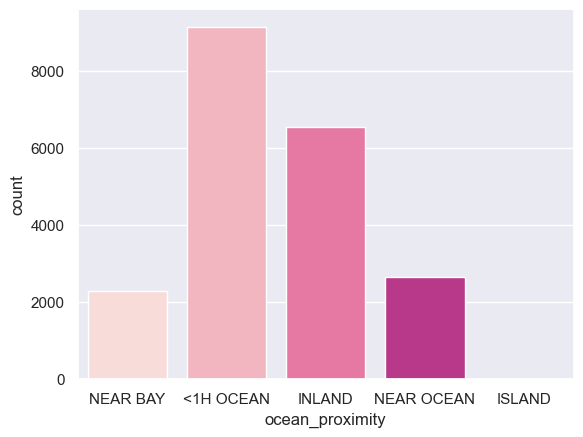

In [14]:
sns.countplot(x = data['ocean_proximity'], palette= 'RdPu');

Creating a scatter plot of the geogrophical location. Where the x-axis represents the longitude and the y-axis represents the latitude. Each point in the plot represents a housing district in California.

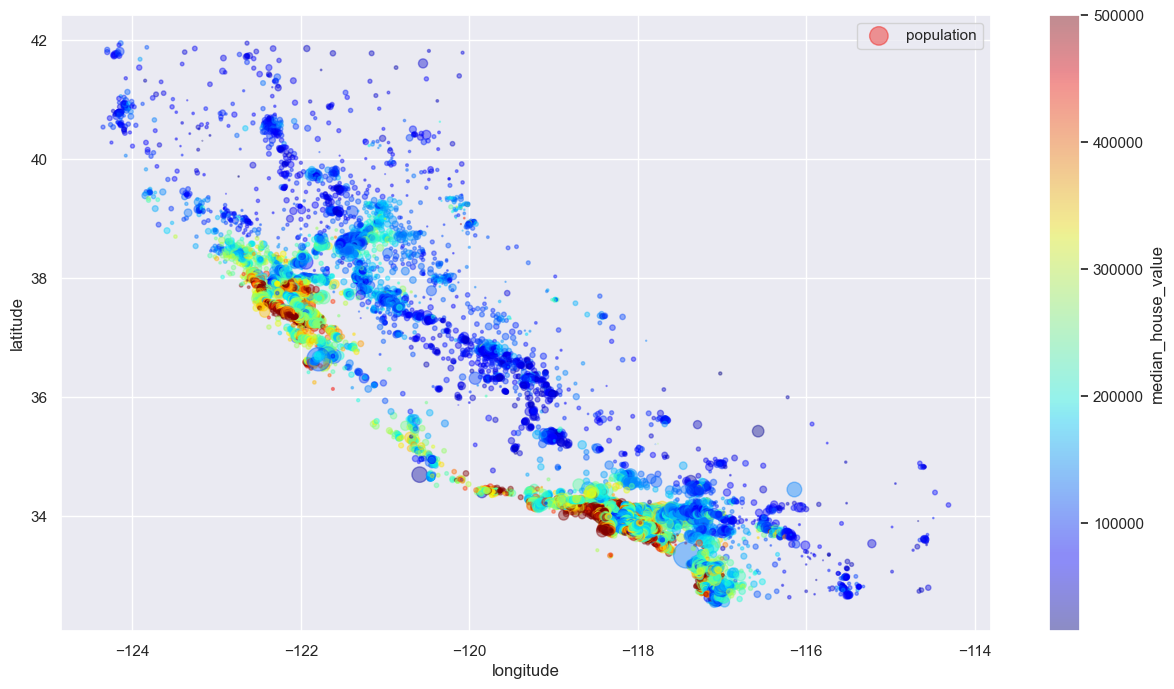

In [15]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=data["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
    )
plt.legend()
plt.show()

## Feature Engineering

In [16]:
data['bed_per_room'] = data['total_bedrooms'] / data['total_rooms']

log transformation

In [17]:
X = data.drop(['median_house_value'], axis=1)
y = np.log(data.median_house_value) # Applying log transformation for reduce skewness of the features.

## Feature Transformations

In [18]:
skew_df = pd.DataFrame(X.select_dtypes(np.number).columns, columns= ['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(X[feature]))
skew_df['Abs_Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Abs_Skew'].apply(lambda x: True if x > 0.5 else False)
skew_df

,Feature,Skew,Abs_Skew,Skewed
0,longitude,-0.297780,0.297780,False
1,latitude,0.465919,0.465919,False
2,housing_median_age,0.060326,0.060326,False
3,total_rooms,4.147042,4.147042,True
4,total_bedrooms,3.480888,3.480888,True
5,population,4.935500,4.935500,True
6,households,3.410190,3.410190,True
7,median_income,1.646537,1.646537,True
8,bed_per_room,6.316445,6.316445,True


Compute the skewness of the numerical features


In [19]:
skewed_columns = skew_df[skew_df['Abs_Skew'] > 0.5]['Feature'].values
skewed_columns

array(['total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'bed_per_room'], dtype=object)

Extracts the names of the features from a pandas DataFrame X that have an absolute skewness value greater than 0.5



In [20]:
for column in skewed_columns:
    X[column] = np.log(X[column])

Applying a logarithmic transformation to each feature in 'skewed_columns'. 
Since the skewed_columns contains the names of features with skewness greater than 0.5, the logarithmic transformation is being  used here to reduce the skewness in the data distribution



## Encoding

In [21]:
encoder=LabelEncoder()
X['ocean_proximity']=encoder.fit_transform(X['ocean_proximity'])

Transforms the categorical data into numerical values.



## Scaling

In [22]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bed_per_room
0,-122.23,37.88,41.0,6.779922,4.859812,5.774552,4.836282,2.119287,3,-1.920110
1,-122.22,37.86,21.0,8.867709,7.008505,7.783641,7.037028,2.116424,3,-1.859204
2,-122.24,37.85,52.0,7.290975,5.247024,6.206576,5.176150,1.982022,3,-2.043951
3,-122.25,37.85,52.0,7.149917,5.459586,6.324359,5.389072,1.730434,3,-1.690331
4,-122.25,37.85,52.0,7.394493,5.634790,6.336826,5.556828,1.347086,3,-1.759704


In [23]:
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index= X.index, columns= X.columns)

## Splitting Data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

## Model Training - Random Forest

In [25]:
rf = RandomForestRegressor(n_estimators= 100)
rf = rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test) # Get the prediction

## Save the model

In [26]:
if not os.path.isfile("rf.pickle"):
    # Pickle the model
    with open('rf.pickle', 'wb') as files:
        pickle.dump(rf, files)        

## Evaluation

In [28]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_rf))
r2 = r2_score(y_test, predictions_rf)

print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 0.23439839688594835
R-square: 0.8307196974129278


In [29]:
predictions_rf = np.exp(predictions_rf)
y_test = np.exp(y_test)

In [30]:
pd.DataFrame({'Actual': y_test, 'Predicted': predictions_rf.round(2)})

,Actual,Predicted
20046,47700.0,51900.57
3024,45800.0,89247.73
15663,500001.0,446148.20
20484,218600.0,258144.63
9814,278000.0,233629.43
...,...,...
15362,263300.0,241450.20
16623,266800.0,230996.89
18086,500001.0,497769.33
2144,72300.0,73271.87


## Visualising the predicted result

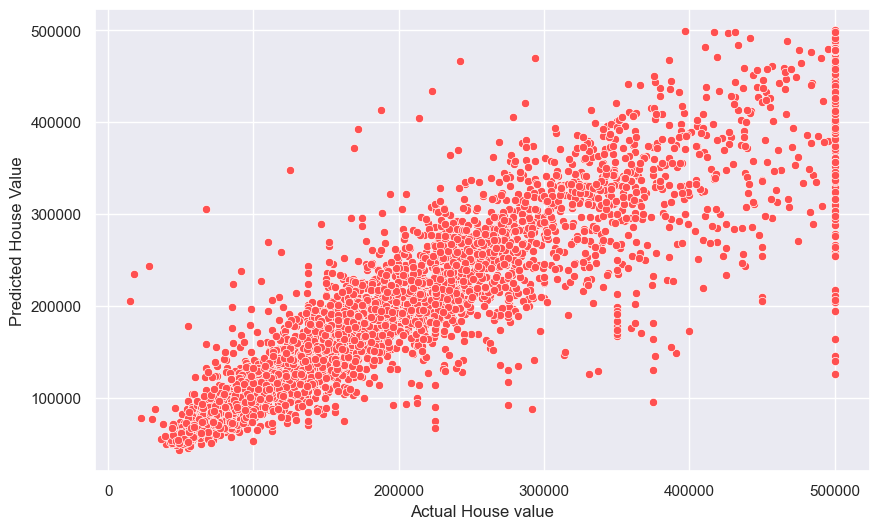

In [40]:
plt.figure(figsize= (10, 6))
sns.scatterplot(x= y_test, y= predictions_rf, color= '#ff5050')
plt.xlabel('Actual House value')
plt.ylabel('Predicted House Value')
plt.show()

## Error Distribution

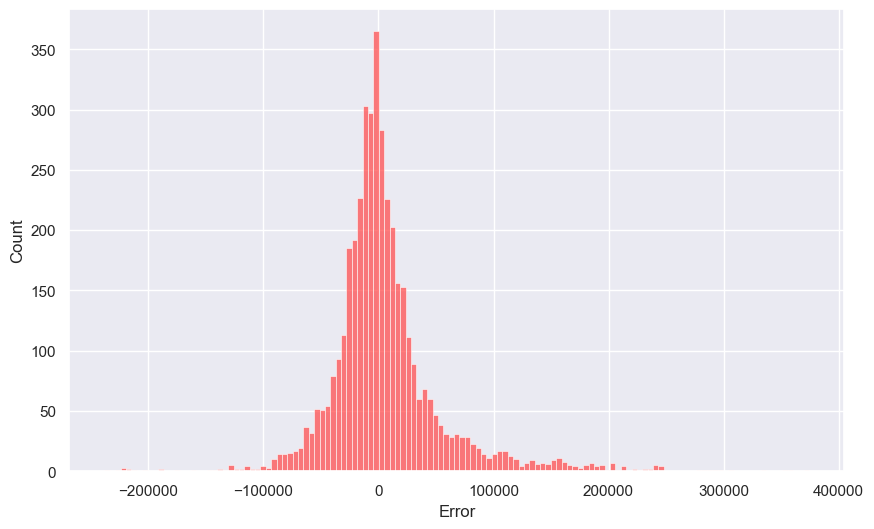

In [41]:
resid = y_test - predictions_rf
plt.figure(figsize= (10, 6))
sns.histplot(resid, color= '#ff5050')
plt.xlabel('Error');

### The distribution of errors appears to follow a normal distribution, indicating that our model is performing reasonably well in its predictions.